In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg
/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg
/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg
/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg
/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg
/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg
/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg
/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg
/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg
/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/89d970411d.jpg
/kaggle/input/gan-getting-started/monet_jpg/7960adbd50.j

In [2]:
monet_path = '/kaggle/input/gan-getting-started/monet_jpg/'
photo_path = '/kaggle/input/gan-getting-started/photo_jpg/'

In [3]:
transform = transforms.Compose([
    transforms.Resize((256,256)),transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

In [4]:
class MonetDataset(Dataset):
    def __init__(self, monet_dir, photo_dir, transform=None):
        self.monet_files = [os.path.join(monet_dir, f) for f in os.listdir(monet_dir)]
        self.photo_files = [os.path.join(photo_dir, f) for f in os.listdir(photo_dir)]
        self.transform = transform

    def __len__(self):
        return min(len(self.monet_files), len(self.photo_files))  # Match dataset size

    def __getitem__(self, idx):
        monet_img = Image.open(self.monet_files[idx]).convert("RGB")
        photo_img = Image.open(self.photo_files[idx]).convert("RGB")

        if self.transform:
            monet_img = self.transform(monet_img)
            photo_img = self.transform(photo_img)

        return monet_img, photo_img
        

In [5]:
#Load the data
dataset = MonetDataset(monet_path, photo_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4)

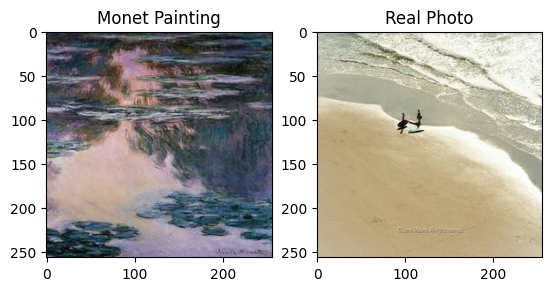

In [6]:
#Let's visualize the data
import matplotlib.pyplot as plt
sample_monet, sample_photo = next(iter(dataloader))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(sample_monet.squeeze().permute(1, 2, 0) * 0.5 + 0.5)
ax[0].set_title("Monet Painting")
ax[1].imshow(sample_photo.squeeze().permute(1, 2, 0) * 0.5 + 0.5)
ax[1].set_title("Real Photo")
plt.show()